In [8]:
import matplotlib.pyplot as plt
import numpy as np
import analyzer
import Compare
import Read
import Maxima
import array
import re
import os
import sys
import pickle
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import importlib
import timeit
import struct
import Plot_generator
from timeit import default_timer as timer
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Maxima)
importlib.reload(Plot_generator)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"text.usetex": True, "font.size": 16})


### Check reading

In [211]:
a=np.zeros(5)

In [236]:
(1000-120)/20

44.0

[12. 12.  9.  9.  7.  8.  6. 11. 20. 19. 15. 18. 19. 17. 13.]
[ 0.  4. 25. 57. 48. 39. 28. 33. 26. 41. 39. 43. 41. 46. 43.]
89


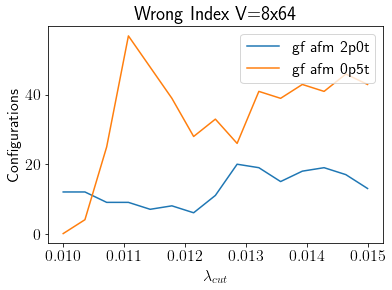

In [245]:
folder="/ssd/ivsol/filtering/8x8x8x64_su2/compare_4p0t_cut/gf_afm_2p0t/"
count=np.zeros(15)
threshold=np.linspace(0.01,0.015,num=15)
for cut in range(0,15):
    modes=np.loadtxt(folder+"modes_used_"+str(cut)+".txt")
    for element in modes:
        if np.abs(element[3])%2:
            count[cut]+=1
plt.plot(threshold,count,label="gf afm 2p0t")
print(count)

folder="/ssd/ivsol/filtering/8x8x8x64_su2/compare_4p0t_cut_0p5t/gf_afm_0p5t/"
count=np.zeros(15)
for cut in range(0,15):
    modes=np.loadtxt(folder+"modes_used_"+str(cut)+".txt")
    for element in modes:
        if np.abs(element[3])%2:
            count[cut]+=1
plt.plot(threshold,count,label="gf afm 0p5t")
plt.ylabel("Configurations")
plt.xlabel(r'$\lambda_{cut}$')
plt.title(r'Wrong Index V=8x64')
plt.legend(loc="upper right")
plt.savefig("/ssd/ivsol/filtering/8x8x8x64_su2/compare_4p0t_cut/Index.png", dpi=150, bbox_inches='tight')
print(count)

GM=np.loadtxt(folder+"GM_hist_"+str(cut)+".txt")
print(len(GM))

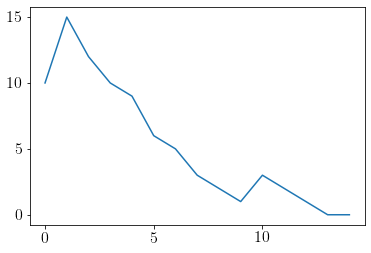

In [217]:
plt.plot(count)

In [216]:
print(count)

[10. 15. 12. 10.  9.  6.  5.  3.  2.  1.  3.  2.  1.  0.  0.]


In [194]:
conf_start=10
conf_end=1000
conf_step=10
conf=np.arange(conf_start,conf_end,conf_step)
folder_gf="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf/"
#folder_gf="/ssd/ivsol/filtering/8x8x8x64_su2/gf/"

top_gauge,conf_read=analyzer.Count_index_gf(folder_gf,conf)

In [195]:
#conf_read.remove('890')
#conf_read.remove('830')
#conf_read.remove('540')

In [214]:
sqrt

44.0

In [196]:
lambdas=np.arange(0,0.15,0.01)
folder_in="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_0p25t"
#folder_in="/ssd/ivsol/filtering/8x8x8x64_su2/gf_afm_2p0t"
max_modes=12
pattern="OverlapFilterModeR"
for threshold in lambdas:
    #Check how many modes for each configuration we need to read )
    susy_read_s0, susy_read_s1 ,start_spectrum, conf_min = analyzer.Count_index_cut(folder_in,"",threshold,conf_read,max_modes,pattern)
    if start_spectrum:
        print(threshold,conf_min)

0.0 980
0.01 980
0.02 890
0.03 890
0.04 890
0.05 890
0.06 890
0.07 280


In [205]:
#To check when one runs out of modes
folder_in="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_0p25t/"
#folder_in="/ssd/ivsol/filtering/8x8x8x64_su2/gf_afm_2p0t/"
top_gauge,conf_read=analyzer.Count_index_gf(folder_gf,conf)
end_susy,end_overlap,conf_m=analyzer.End_spectrum(folder_in,conf_read) #Computes the last value of the spectrum

#Check which in which lambda one crosses the last value of the spectrum
i=0
susy_max=[lambdas[len(lambdas)-1], len(lambdas)] #The position of the end of the spectrum initilized at the end of the cuts
for threshold in lambdas:
    if "OverlapFilterModeR" in pattern:
        if threshold > end_susy:
            susy_max=[threshold,i]
            break
    else :
        if threshold > end_overlap:
            susy_max=[threshold,i]
            break
    i+=1             
print(end_susy, conf_m)

0.05499761780427522 100


### Minimum main

In [3]:
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Plot_generator)

#folder_in=str(sys.argv[1]) #./gf_afm_1p5t/ 
#tao_compare=str(sys.argv[2]) # 1.5
#folder_out=str(sys.argv[3]) #./compare_1p5t/gf_afm_1p5t/  

folder_in="../4x4x4x32/b2p44_new/gf_afm_2p0t/"
tao_compare=str(2)
folder_out="../4x4x4x32/b2p44_new/compare_2p0t/gf_afm_2p0t/"

sizes=[4,4,4,32]
max_modes=8
colors=3
spin_length=4

lambda_min=0.10
lambda_max=0.40
steps=4
lambdas=np.linspace(lambda_min,lambda_max,num=steps)
RPO_threshold=0.15

conf_start=10
conf_end=100
conf_step=10
conf=np.arange(conf_start,conf_end,conf_step)
folder_gf="../4x4x4x32/b2p44_new/gf/"

#top_gauge,conf_read=analyzer.Count_index_gf(folder_gf,conf)

#Compare.GM_RPO_cut(folder_in,folder_out,sizes,max_modes,colors,spin_length,conf_read,lambdas,RPO_threshold,tao_compare)
#Compare.GM_doublers(folder_in,folder_out,sizes,max_modes,colors,spin_length,conf_read,lambdas,RPO_threshold,tao_compare)

#Plot_generator.histogram(folder_out,"GM_doublers.txt")


In [104]:
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Plot_generator)

#main plot
folder_modes="../4x4x4x32/b2p44_new/"
tau_compare=str(2)
folder_out="../4x4x4x32/b2p44_new/compare_2p0t/"
RPO_threshold=0.17

#Plots about GM
observable="GM"
Plot_generator.MC_history(folder_out,folder_out,measures,lambdas,observable)
Plot_generator.Cut_dependence(folder_out,folder_out,measures,observable)

#Plot with the GF
folder_gf="../4x4x4x32/b2p44_new/gf/"
t_start=0
t_end=4
t_step=0.25
Plot_generator.GF_vs_AFM(folder_out, folder_gf, folder_out, conf_read, t_start, t_end, t_step,
                         RPO_threshold,tau_compare,measures,time_measures,observable)

#Susy_plots
measures=np.loadtxt(folder_out+"measures.txt", dtype=str)[0]
for measure in measures:
    f=open(folder_out+measure+"lambda_opt.txt",'r')
    lamba_string=f.read().split('\n')
    lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
    f.close()

    susy_read_s0=analyzer.Count_index(folder_modes+measure+"/sector_0/Measure.seq",
                                      ":OverlapFilterModeR:",lambda_opt,conf_read)
    susy_read_s1=analyzer.Count_index(folder_modes+measure+"/sector_1/Measure.seq",
                                      ":OverlapFilterModeR:",lambda_opt,conf_read)

    Plot_generator.susy_plot(folder_modes+measure,folder_out+measure,sizes,colors,
                             spin_length,max_modes,conf_read,susy_read_s0,susy_read_s1)


gf_afm_2p0t/
0
1
2
3
2


FileNotFoundError: ../4x4x4x32/b2p44_new/compare_2p0t/2./GM_hist_0.txt not found.

### Using all modes

In [73]:
(780-140)/20

32.0

In [72]:
len(conf_miss)

39

In [71]:
folder_name="../4x4x4x32/b2p44_new/gf_afm_0p5t/"
conf_miss=[50,60,70,110,130,160,170,180,190,280,290,320,330,360,390,400,420,450,460,470,500,520,540,550,620,650,660,690,740,770,780,800,820,830,840,890,930,960,980]
#conf_miss=[390,620,830,840]
folder_out=folder_name+"all_modes/"
sizes=[4,4,4,32]
range_color=3
range_spin=4
max_modes=8
t=np.arange(sizes[3])
for conf in conf_miss:
    susy_mode_1=np.zeros(sizes[3])
    for i in range(0,max_modes):
        file=folder_name+"sector_1/SusyMode_bin_"+str(i)+"-"+str(conf)
        density,sizes=Read.bin_mode_1d(file,sizes,range_color,range_spin)
        susy_mode_1+=density
    plt.plot(t,susy_mode_1)
    Topology=folder_name+"../gf/profile4dt2c"+str(conf)+"to.dat"
    density_top,sizes=Read.topology_1d(Topology)
    plt.plot(t,density_top)
    plt.savefig(folder_out+"Susymode1_"+str(conf)+".png", dpi=150, bbox_inches='tight')
    plt.close()
    
    susy_mode_0=np.zeros(sizes[3])
    for i in range(0,max_modes):
        file=folder_name+"sector_0/SusyMode_bin_"+str(i)+"-"+str(conf)
        density,sizes=Read.bin_mode_1d(file,sizes,range_color,range_spin)
        susy_mode_0+=density
    plt.plot(t,-susy_mode_0)
    Topology=folder_name+"../gf/profile4dt2c"+str(conf)+"to.dat"
    density_top,sizes=Read.topology_1d(Topology)
    plt.plot(t,density_top)
    plt.savefig(folder_out+"Susymode0_"+str(conf)+".png", dpi=150, bbox_inches='tight')
    plt.close()

### Xi max and GF

In [1027]:
def Xi_max(data,susy_max):
    maximum=0
    for i in range(0,len(data[0])):
            if (data[0,i] > maximum) and (data[1,i]<susy_max[0]):
                maximum=data[0,i]
    return(maximum)

In [1028]:
def find_max(folder,measure,observable):
    data=np.loadtxt(folder+measure+observable+".txt")
    if measure=="gf_afm_0p0t/":
        susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
    else:
        susy_max=np.loadtxt(folder+measure+"end_spectrum.txt")
    maximum=Xi_max(data,susy_max)
    return(maximum)

In [1026]:
importlib.reload(Compare)
importlib.reload(analyzer)
folder_in="../4x4x4x32/b2p44_new/gf/"
folder_out="../4x4x4x32/b2p44_new/compare_4p0t/"
#folder="../4x4x4x32/b2p44_new/gf/"
conf_start=10
conf_end=1000
conf_step=10
configurations=np.arange(conf_start,conf_end,conf_step)
t_start=0
t_end=4
t_step=0.25
RPO_trehsold=0.175
tau_compare=4

GM_GF=Compare.GF_vs_GF(folder_in, folder_out, configurations, t_start, t_end, t_step,RPO_trehsold,tau_compare)

In [1214]:
print(measure)

gf_afm_0p0t/


[0.99477457 0.98654417 0.         0.90375596 0.85876687 0.7785188
 0.70801853 0.64034103 0.37320505]
../4x4x4x32/b2p44_new/compare_4p0t/
GM


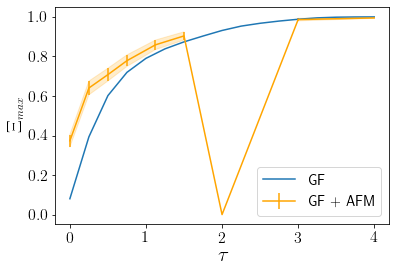

In [1226]:
plt.rcParams.update({'font.size': 16})
ax = plt.gca()
observable="GM"
folder="../4x4x4x32/b2p44_new/compare_4p0t/"
maximum=np.zeros((9))
error=np.zeros((9))
t=0
for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/", "gf_afm_1p5t/", "gf_afm_1p125t/", "gf_afm_0p75t/","gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    data=np.loadtxt(folder+measure+observable+".txt")
    
    f=open(folder+measure+"lambda_opt.txt",'r')
    lamba_string=f.read().split('\n')
    lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
    f.close()
    f=open(folder+measure+"GM_error_opt_"+str(index_opt)+".txt",'r')
    error[t]=float(f.read())
    f.close()
    
    maximum[t]=find_max(folder,measure,observable)
    t+=1
print(maximum)
t=[4,3,2,1.5,1.125,0.75,0.5,0.25,0]

observable="GM"
data=np.loadtxt(folder+observable+".txt")
print(folder)
print(observable)
plt.xlabel(r'$$ \mbox{\huge $\tau$} $$')
plt.ylabel(r'$$ \mbox{\huge $ \Xi$}_{max}$$')

plt.rcParams.update({'font.size': 16})
#plt.title('(GF + AFM) vs GF')
plt.plot(data[1],data[0], label=r'{\Large GF}')
plt.errorbar(t,maximum, yerr=error, color="orange", label=r'{\Large GF + AFM}')
plt.fill_between(t, maximum-error, maximum+error,color="orange",alpha=0.2)
plt.legend(loc="lower right")
plt.savefig(folder+"./GF_AFM_4p0t.pdf",dpi=150, bbox_inches='tight')

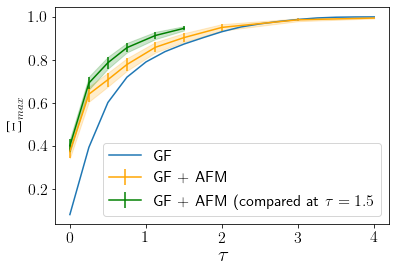

In [1048]:
observable="GM"
folder="../4x4x4x32/b2p44_new/compare_4p0t/"
maximum=np.zeros((9))
error=np.zeros((9))
t=0
for measure in ("gf_afm_4p0t/", "gf_afm_3p0t/", "gf_afm_2p0t/", "gf_afm_1p5t/", "gf_afm_1p125t/", "gf_afm_0p75t/","gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    data=np.loadtxt(folder+measure+observable+".txt")
    
    f=open(folder+measure+"lambda_opt.txt",'r')
    lamba_string=f.read().split('\n')
    lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
    f.close()
    f=open(folder+measure+"GM_error_opt_"+str(index_opt)+".txt",'r')
    error[t]=float(f.read())
    f.close()
    
    maximum[t]=find_max(folder,measure,observable)
    t+=1
t=[4,3,2,1.5,1.125,0.75,0.5,0.25,0]

observable="GM"
data=np.loadtxt(folder+observable+".txt")
plt.xlabel("t")
plt.ylabel(r'$\Xi$')
plt.rcParams.update({'font.size': 12})
#plt.title('(GF + AFM) vs GF')
plt.plot(data[1],data[0], label="GF")
plt.errorbar(t,maximum, yerr=error, color="orange", label="GF + AFM")
plt.fill_between(t, maximum-error, maximum+error,color="orange",alpha=0.2)
plt.legend(loc="lower right")

observable="GM"
folder="../4x4x4x32/b2p44_new/compare_1p5t/"
maximum=np.zeros((6))
error=np.zeros((6))
t=0
for measure in ("gf_afm_1p5t/", "gf_afm_1p125t/", "gf_afm_0p75t/","gf_afm_0p5t/", "gf_afm_0p25t/","gf_afm_0p0t/"):
    data=np.loadtxt(folder+measure+observable+".txt")
    
    f=open(folder+measure+"lambda_opt.txt",'r')
    lamba_string=f.read().split('\n')
    lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
    f.close()
    f=open(folder+measure+"GM_error_opt_"+str(index_opt)+".txt",'r')
    error[t]=float(f.read())
    f.close()
    
    maximum[t]=find_max(folder,measure,observable)
    t+=1
t=[1.5,1.125,0.75,0.5,0.25,0]

observable="GM"
#data=np.loadtxt(folder+observable+".txt")

plt.xlabel(r'$$ \mbox{\huge $\tau$} $$')
plt.ylabel(r'$$ \mbox{\huge $ \Xi$}_{max}$$')

plt.rcParams.update({'font.size': 16})
#plt.title('(GF + AFM) vs GF')
#plt.plot(data[1],data[0], label="GF")
plt.errorbar(t,maximum, yerr=error, color="green", label=r'GF + AFM (compared at $\tau=1.5$')
plt.fill_between(t, maximum-error, maximum+error,color="green",alpha=0.2)
plt.legend(loc="lower right")
plt.savefig(folder+"./GF_AFM_1p5t.pdf",dpi=150, bbox_inches='tight')

### Example Configurations

In [9]:
measure="gf_afm_0p5t/"
folder_out='../4x4x4x32/b2p44_new/compare_4p0t_cut/'
f=open(folder_out+measure+"lambda_opt.txt",'r')
lamba_string=f.read().split('\n')
lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
f.close()
GM=np.loadtxt(folder_out+measure+"GM_history_opt.txt")
conf_read=[]
count=0
for element in GM:
    if element[1]>0.65:
        #print(element)
        conf_read.append(int(element[0]))
        count+=1
print(count)

43


0 0 660


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

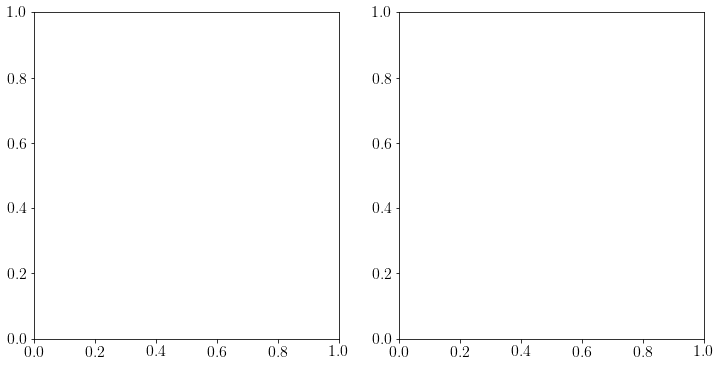

In [12]:
folder_out='../4x4x4x32/b2p44_new/compare_4p0t_cut/'
folder="../4x4x4x32/b2p44_new/compare_4p0t_cut/"
measure="gf_afm_0p5t/"
#ax = plt.gca()
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,6))
index=0

f=open(folder_out+measure+"lambda_opt.txt",'r')
lamba_string=f.read().split('\n')
lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
f.close()

conf_read=[660,600]
#conf_read=[470,540]
GM=np.loadtxt(folder_out+measure+"GM_history_opt.txt")
        
for conf in conf_read:
    #Read GF
    Topology_1=folder+"../gf/profile4dt0.5c"+str(conf)+"to.dat"
    Topology_2=folder+"../gf/profile4dt2c"+str(conf)+"to.dat"
    Topology_3=folder+"../gf/profile4dt4c"+str(conf)+"to.dat"
    density_top_1,sizes=Read.topology_1d(Topology_1)
    density_top_2,sizes=Read.topology_1d(Topology_2)
    density_top_3,sizes=Read.topology_1d(Topology_3)
    
    normalization=np.sum(np.abs(density_top_3))

    #Construct susy mode
    density_susy=np.loadtxt(folder+measure+"susy_mode_"+str(conf)+"c_optimalcut.txt")
    #density_susy=density_susy*(normalization/np.sum(np.abs(density_susy)))

    i=index%2
    j=int(index/2)%2
    print(i,j,conf)
    #Plot the three densities
    axes[i,j].plot(density_top_1,label=r'Top. density $\tau=0.5$')
    axes[i,j].plot(density_top_2, label=r'Top. density $\tau=2$')
    axes[i,j].plot(density_top_3, label=r'Top. density $\tau=4$')
    axes[i,j].plot(density_susy, label=r'SZM density $\tau=0.5$')
    axes[i,j].set_ylim([-0.25,0.25])
    axes[i,j].set_title("configuration: "+str(conf))
    
    if j==0:
        axes[i,j].set_ylabel(r'q(t)')
    if j==1:
        axes[i,j].set_yticklabels([])
    if i==0:
        axes[i,j].set_xticklabels([])
    if i==1:
        axes[i,j].set_xlabel(r't')
    
    index+=1
    
box = axes[0,0].get_position()
axes[0,0].set_position([box.x0, box.y0, box.width * 1, box.height])

# Put a legend to the right of the current axis
axes[0,0].legend(loc="center", ncol=2, bbox_to_anchor=(1.10, 1.40))

fig.savefig(folder_out+"MC_densities.pdf",dpi=150, bbox_inches='tight')

plt.show()




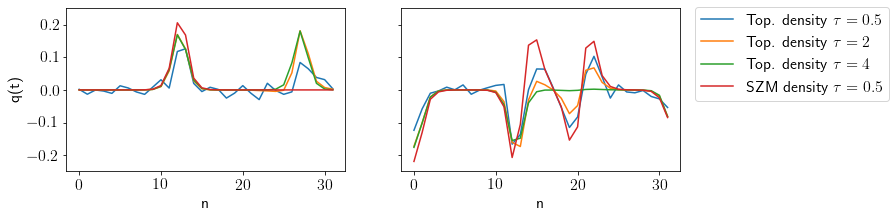

In [45]:
folder_out='../4x4x4x32/b2p44_new/compare_4p0t_cut/'
folder="../4x4x4x32/b2p44_new/compare_4p0t_cut/"
measure="gf_afm_0p5t/"
#ax = plt.gca()
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(11,3))
index=0

f=open(folder_out+measure+"lambda_opt.txt",'r')
lamba_string=f.read().split('\n')
lambda_opt,index_opt=float(lamba_string[0]), int(float(lamba_string[1]))
f.close()

conf_read=[660,600]
#conf_read=[470,540]
GM=np.loadtxt(folder_out+measure+"GM_history_opt.txt")

i=0
for conf in conf_read:
    #Read GF
    Topology_1=folder+"../gf/profile4dt0.5c"+str(conf)+"to.dat"
    Topology_2=folder+"../gf/profile4dt2c"+str(conf)+"to.dat"
    Topology_3=folder+"../gf/profile4dt4c"+str(conf)+"to.dat"
    density_top_1,sizes=Read.topology_1d(Topology_1)
    density_top_2,sizes=Read.topology_1d(Topology_2)
    density_top_3,sizes=Read.topology_1d(Topology_3)
    
    normalization=np.sum(np.abs(density_top_3))

    #Construct susy mode
    density_susy=np.loadtxt(folder+measure+"susy_mode_"+str(conf)+"c_optimalcut.txt")
    #density_susy=density_susy*(normalization/np.sum(np.abs(density_susy)))

    #Plot the three densities
    axes[i].plot(density_top_1,label=r'Top. density $\tau=0.5$')
    axes[i].plot(density_top_2, label=r'Top. density $\tau=2$')
    axes[i].plot(density_top_3, label=r'Top. density $\tau=4$')
    axes[i].plot(density_susy, label=r'SZM density $\tau=0.5$')
    axes[i].set_ylim([-0.25,0.25])
    #axes[i].set_title("configuration: "+str(conf))
    
    if i==0:
        axes[i].set_ylabel(r'q(t)')
    if i==1:
        axes[i].set_yticklabels([])
    #if i==0:
    #    axes[i].set_xticklabels([])
    #if i==1:
    axes[i].set_xlabel(r'n')
    
    i+=1
    
box = axes[0].get_position()
axes[0].set_position([box.x0, box.y0, box.width * 1, box.height])

# Put a legend to the right of the current axis
axes[0].legend(loc="center", ncol=1, bbox_to_anchor=(2.60, 0.72))

fig.savefig(folder_out+"MC_densities.pdf",dpi=150, bbox_inches='tight')

plt.show()


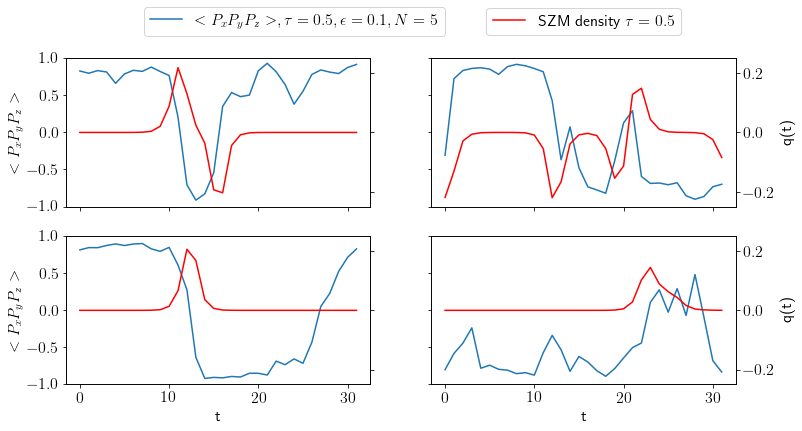

In [72]:
folder_out='../4x4x4x32/b2p44_new/compare_4p0t/'
polyakov_file="../4x4x4x32/b2p44_new/Polyakov_loops/0p5t/Measure.seq_pol"
measure="gf_afm_0p5t/"
#ax = plt.gca()
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,6))
index=0

conf_read=[310,660,600,980]
        
for conf in conf_read:
    #Read the susy mode
    density_susy=np.loadtxt(folder+measure+"susy_mode_"+str(conf)+"c.txt")
    
    polyakov=[]
    #Read the polyakov
    with open(polyakov_file) as f:
        for line in f:
            splitted=line.split(":")
            #print(splitted)
            if splitted[1]==str(conf):
                element=splitted[5].split(",")
                polyakov.append(float(element[0].replace("(", "")))
                
    i=index%2
    j=int(index/2)%2
    #Plot the polyakov loop
    axes[i,j].plot(polyakov, label=r' $<P_xP_yP_z>, \tau=0.5, \epsilon = 0.1, N=5$')
    #Plot the density with the other axes
    axes2=axes[i,j].twinx()
    axes2.plot(density_susy, label=r'SZM density $\tau=0.5$', color='red')
    
    if j==0:
        axes[i,j].set_ylabel(r'$<P_xP_yP_z>$')
        axes2.set_yticklabels([])
        if i==0:
            axes[i,j].set_xticklabels([])
            axes2.set_ylim([-0.25,0.25])
            
    if j==1:
        axes2.set_ylabel(r'q(t)')
        axes[i,j].set_yticklabels([])
        if i==0:
            axes[i,j].set_yticklabels([])
            axes[i,j].set_xticklabels([])
            axes2.set_ylim([-0.25,0.25])
    if i==1:
        axes2.set_ylim([-0.25,0.25])
        axes[i,j].set_xlabel(r't')
    
    axes[i,j].set_ylim([-1,1])
    
    index+=1
    
box = axes[0,0].get_position()
axes[0,0].set_position([box.x0, box.y0, box.width * 1, box.height])

# Put a legend to the right of the current axis
axes[0,0].legend(loc="center", ncol=2, bbox_to_anchor=(0.75, 1.25))

box = axes2.get_position()
axes2.set_position([box.x0, box.y0, box.width * 1, box.height])

# Put a legend to the right of the current axis
axes2.legend(loc="center", ncol=2, bbox_to_anchor=(0.5, 2.45))


fig.savefig(folder_out+"Polyakov.pdf",dpi=150, bbox_inches='tight')

plt.show()


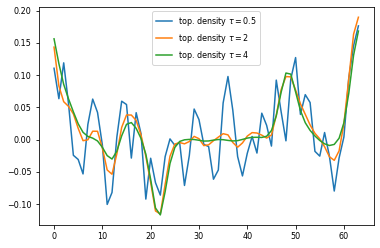

In [28]:
folder="../8x8x8x64_su2/b2p60/"
#measure="gf/"
conf=2300
#Read GF
Topology_1=folder+"./gf/profile4dt0.5c"+str(conf)+"to.dat"
Topology_2=folder+"./gf/profile4dt2c"+str(conf)+"to.dat"
Topology_3=folder+"./gf/profile4dt4c"+str(conf)+"to.dat"
density_top_1,sizes=Read.topology_1d(Topology_1)
density_top_2,sizes=Read.topology_1d(Topology_2)
density_top_3,sizes=Read.topology_1d(Topology_3)

normalization=np.sum(np.abs(density_top_3))

#Construct susy mode
#density_susy=np.loadtxt(folder+measure+"susy_mode_"+str(conf)+"c.txt")
#density_susy=density_susy*(normalization/np.sum(np.abs(density_susy)))
#Plot the three densities
plt.plot(density_top_1, label=r'top. density $\tau=0.5$')
plt.plot(density_top_2, label=r'top. density $\tau=2$')
plt.plot(density_top_3, label=r'top. density $\tau=4$')
#plt.plot(density_susy, label=r'AFM at $\tau=0.5$')
plt.legend(loc="upper center", ncol=1)
plt.savefig(folder+"gf/gf_"+str(conf)+"c.png",dpi=150, bbox_inches='tight')
#plt.close()

### Doublers 

In [2]:
measure="SusyMode_bin"
sizes=[4,4,4,32]
t=np.arange(0,sizes[3])
colors=3
spin=4

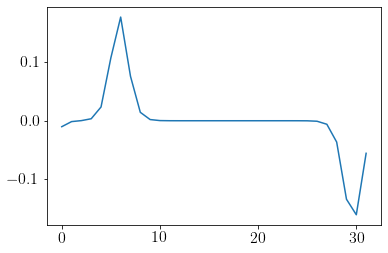

In [3]:
conf=550
folder_0="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf/"
density_top,sizes=Read.topology_1d(folder_0+"profile4dt4c"+str(conf)+"to.dat")
plt.plot(density_top)

In [4]:
conf=550
folder_0="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_0p5t/doublers/sector_0/"
folder_dou="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_0p5t/doublers/sector_1/"
GM=np.zeros((8,8))
for i in range(0,1,1):
    for j in range(0,8,1):
        mode=folder_0+"SusyMode_bin_"+str(i)+"-"+str(conf)
        density,sizes=Read.bin_mode(mode,sizes,colors,spin)
        density_s0=density.sum(axis=(0,1,2))

        mode=folder_dou+"SusyMode_bin_"+str(j)+"-"+str(conf)
        density,sizes=Read.bin_mode(mode,sizes,colors,spin)
        density_s1=density.sum(axis=(0,1,2))
        
        GM[i,j]=Compare.Geom_mean_1d(density_s1,density_s0)
        if GM[i,j]>0.99:
            print(i,j,GM[i,j])
        #density=-density_s0
        #density=density_s1
        #density=density_s1-density_s0
            fig, axes = plt.subplots()
            axes.plot(t,-density_s0,label=r'$\mathcal{O}_-$ First excited mode')
            axes.plot(t,density_s1,label=r'$\mathcal{O}_+$ Lowest mode')
            axes.plot(density_top, label="Top. density")
            box = axes.get_position()
            axes.set_position([box.x0, box.y0, box.width * 1, box.height])
            axes.set_ylabel(r'q(t)')
            axes.set_xlabel(r't')
            # Put a legend to the right of the current axis
            axes.legend(loc="center", ncol=1, bbox_to_anchor=(1.35, 0.835))
            fig.savefig("/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_0p5t/doublers/doublers.pdf",dpi=150, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_0p5t/doublers/sector_0/SusyMode_bin_0-550'

In [14]:
conf=550
folder="../filtering/4x4x4x32/b2p44_new/gf_afm_0p5t/"
for i in range(0,8,1):
    measure="sector_0/"
    mode=folder+measure+"SusyMode_bin_"+str(i)+"-"+str(conf)
    density,sizes=Read.bin_mode(mode,sizes,colors,spin)
    density_s0=density.sum(axis=(0,1,2))
    
    measure="sector_1/"
    mode=folder+measure+"SusyMode_bin_"+str(i)+"-"+str(conf)
    density,sizes=Read.bin_mode(mode,sizes,colors,spin)
    density_s1=density.sum(axis=(0,1,2))
    
    density=-density_s0
    density=density_s1
    #density=density_s1-density_s0
    plt.plot(t,density)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../filtering/4x4x4x32/b2p44_new/gf_afm_0p5t/sector_0/SusyMode_bin_0-550'

### Higher kappa

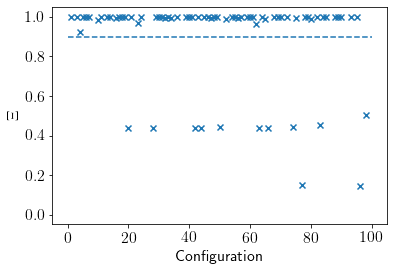

In [69]:
folder="../4x4x4x32/b2p44_new/compare_4p0t_cut/"
GM={}
for kappa in [""]:
    subfolder=folder+"gf_afm_4p0t"+kappa+"/"
    GM[kappa]=np.loadtxt(subfolder+"GM_history_opt.txt")
for key in GM:
    x=[]
    y=[]
    mean=0
    for element in GM[key]:
        x.append(int(element[0])/10)
        y.append(float(element[1]))
        mean+=float(element[1])
    mean/=len(GM[key])
   
    color_plot="tab:blue"
    linestyle_plot="dashed"
    marker_plot="x"
    if "k" in key:
        color_plot="tab:orange"
        linestyle_plot="dotted"
        pointstyle_plot="O"
    plt.hlines(mean, xmin=0, xmax=100, linestyle=linestyle_plot, color=color_plot)
    plt.scatter(x,y, marker=marker_plot)
    plt.ylim(-0.05,1.05)
   #plt.xlabel(r'Configuration')
   # plt.ylabel(r'$$ \mbox{\huge $ \Xi$}$$')
    plt.xlabel(r'Configuration')
    plt.ylabel(r'$\Xi$')

    #plt.xticks(np.arange(0, 120,  step=20))
    plt.savefig(folder+"GM_history_2p0t.pdf",dpi=150, bbox_inches='tight')
plt.show()

In [7]:
folder_0="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf/"
folder="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/kappa_dep/"
conf_list=[500,740]
kappa_list=["k_04/","k_08/","k_12/","k_18/","k_22/", "k_28/", "k_36/","k_40/"]
sizes=[4,4,4,32]
colors=3
spin_length=4

t=np.arange(0,sizes[3])
conf=conf_list[1]
max_modes=2
min_modes=0
modes_overlap=4
for kappa in kappa_list:
    for conf in conf_list:
        print(kappa)
        density_s0=np.zeros(32)
        for i in range(min_modes,max_modes):
            mode=folder+kappa+"sector_1/SusyMode_bin_"+str(i)+"-"+str(conf)
            density,sizes=Read.bin_mode(mode,sizes,colors,spin_length)
            density_s0+=density.sum(axis=(0,1,2))/2

        plt.plot(t,density_s0,label="susy zero mode")
        density_top,sizes=Read.topology_1d(folder_0+"profile4dt1.5c"+str(conf)+"to.dat")
        plt.title("Real projected operator")
        plt.plot(t,density_top, color="black", label="topological charge")  
        plt.legend(loc="upper left")
        plt.ylabel("density")
        plt.xlabel("t")
        plt.ylim(-0.05,0.4)
        plt.savefig(folder+kappa+"susy_mode_"+str(conf)+".png", dpi=150, bbox_inches='tight')
        plt.close()

        susy_mode=zeromode=np.zeros((spin_length, colors, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)


    """for i in range(0,modes_overlap):
        mode,density,sizes=Read.ascii_mode(folder+kappa+"sector_1/OverlapMode"+str(conf)+"_"+str(i))
        susy_mode+=mode
    density_1=Read.mode_to_density(susy_mode,colors,spin_length,sizes)
    density_top,sizes=Read.topology_1d(folder_0+"profile4dt1.5c"+str(conf)+"to.dat")
    plt.title("Overlap operator")
    plt.ylabel("density")
    plt.xlabel("t")
    plt.ylim(-0.05,0.4)
    plt.plot(t,density_1/4,label="susy zero mode")
    plt.plot(t,density_top, color="black", label="topological charge") 
    plt.legend(loc="upper left")
    plt.savefig(folder+kappa+"overlap_mode.png", dpi=150, bbox_inches='tight')
    plt.close()"""

    #for i in range(0,max_modes):
    #    mode=folder+kappa+"sector_0/SusyMode_bin_"+str(i)+"-"+str(conf)
    #    density,sizes=Read.bin_mode(mode,sizes,colors,spin_length)
    #    density_s0=density.sum(axis=(0,1,2))
    #    plt.plot(t,-density_s0)
    #density_top,sizes=Read.topology_1d(folder_0+"profile4dt1.5c"+str(conf)+"to.dat")
    #plt.plot(t,density_top, color="black")    
    #plt.show()

k_04/


FileNotFoundError: [Errno 2] No such file or directory: '/ssd/ivsol/filtering/4x4x4x32/b2p44_new/kappa_dep/k_04/sector_1/SusyMode_bin_0-500'

### Overlap

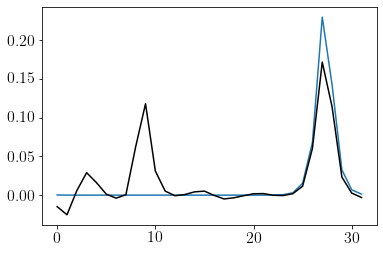

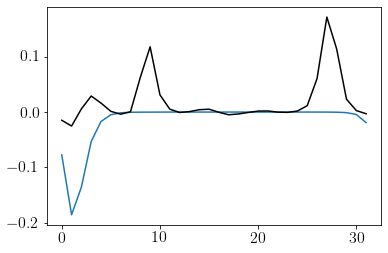

In [5]:
spin_length=4
folder_0="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf/"
folder="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_0p5t_ov/"
conf='420'
t=np.arange(0,sizes[3])
susy_mode=zeromode=np.zeros((spin_length, colors, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
for i in range(0,2):
    mode,density,sizes=Read.ascii_mode(folder+"sector_1/OverlapMode"+str(conf)+"_"+str(i))
    susy_mode+=mode
density_1=Read.mode_to_density(susy_mode,colors,spin_length,sizes)
density_top,sizes=Read.topology_1d(folder_0+"profile4dt1.5c"+str(conf)+"to.dat")
plt.plot(t,density_1/4)
plt.plot(t,density_top, color="black")    
plt.show()

t=np.arange(0,sizes[3])
susy_mode=zeromode=np.zeros((spin_length, colors, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
for i in range(0,2):
    mode,density,sizes=Read.ascii_mode(folder+"sector_0/OverlapMode"+str(conf)+"_"+str(i))
    susy_mode+=mode
density_1=Read.mode_to_density(susy_mode,colors,spin_length,sizes)
density_top,sizes=Read.topology_1d(folder_0+"profile4dt1.5c"+str(conf)+"to.dat")
plt.plot(t,-density_1/4)
plt.plot(t,density_top, color="black")    
plt.show()

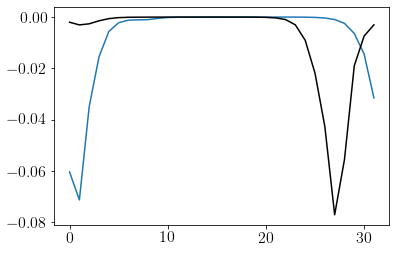

In [76]:
spin_length=4
folder_0="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf/"
folder="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_0p5t/"
conf='320'
t=np.arange(0,sizes[3])
susy_mode_1=zeromode=np.zeros((spin_length, colors, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
susy_mode_2=zeromode=np.zeros((spin_length, colors, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
for i in range(1,2):
    mode=folder+"sector_1/SusyMode_bin"+"_"+str(i+0)+"-"+str(conf)
    density,sizes=Read.bin_mode_1d(mode,sizes,colors,spin_length)
    density_1=density

    mode=folder+"sector_0/SusyMode_bin"+"_"+str(i+2)+"-"+str(conf)
    density,sizes=Read.bin_mode_1d(mode,sizes,colors,spin_length)
    density_2=density
    
density_top,sizes=Read.topology_1d(folder_0+"profile4dt1.5c"+str(conf)+"to.dat")
plt.plot(t,-density_1/4)
plt.plot(t,-density_2/4, color="black")   
plt.show()

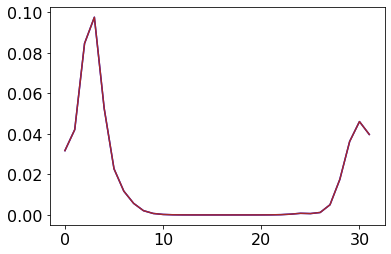

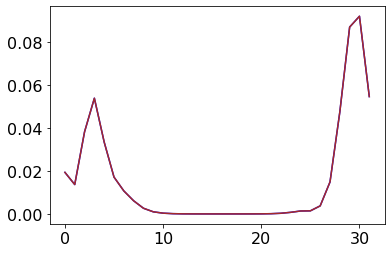

FileNotFoundError: [Errno 2] No such file or directory: '/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_prec/OverlapMode215_8'

In [460]:
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Maxima)
importlib.reload(Plot_generator)

spin_length=4
sizes=[4,4,4,32]
folder_0="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf/"
folder="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_prec/"
conf='215'
t=np.arange(0,sizes[3])
zm1=2
zm2=2
for z in range(0,6):
    susy_mode_1=np.zeros((colors, spin_length, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
    susy_mode_2=np.zeros((colors,spin_length,  sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)    
    for i in range(0,2):
        folder="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_prec/"
        conf='215'
        mode,density,sizes=Read.ascii_mode(folder+"OverlapMode"+str(conf)+"_"+str(2*(zm1+z)+i))
        susy_mode_1+=mode

        folder="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_0p5t_ov/"
        conf='210'
        mode,density,sizes=Read.ascii_mode(folder+"sector_1/OverlapMode"+str(conf)+"_"+str(2*(zm2+z)+i))
        susy_mode_2+=mode

    density_1=Read.mode_to_density(susy_mode_1,colors,spin_length,sizes)    
    density_2=Read.mode_to_density(susy_mode_2,colors,spin_length,sizes)
    #density_1r=Read.mode_real_density(susy_mode_1,colors,spin_length,sizes,1)    
    #density_2r=Read.mode_real_density(susy_mode_2,colors,spin_length,sizes,0)

    
    plt.plot(t,density_1.sum(axis=(0,1,2))/4, color="blue")
    #plt.plot(t,-density_1r.sum(axis=(0,1,2))/4, color="green")


    plt.plot(t,density_2.sum(axis=(0,1,2))/4, color="brown")
    #plt.plot(t,-density_2r.sum(axis=(0,1,2))/4, color="red")  

    #plt.plot(t,density_1/4-density_2/4, color="black")
    plt.show()

Xi: 0.007327457670164393
Scalar: (0.08651045842537211+0.2653997364237713j)
Norm: 1.0000000000000004


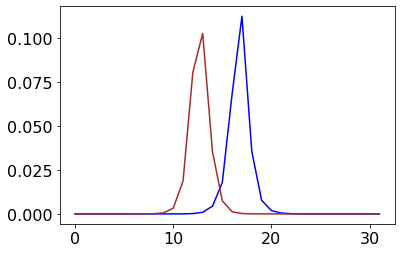

Xi: 0.4725448010000587
Scalar: (0.3700493122367516-0.522906648393874j)
Norm: 0.9999999999999948


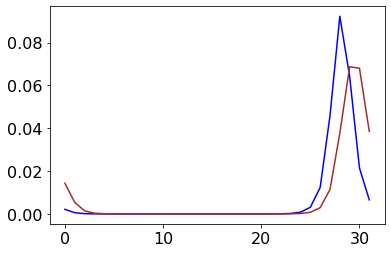

Xi: 0.8913850411327623
Scalar: (0.5183167652440873-0.32884439675271454j)
Norm: 1.0000000000000009


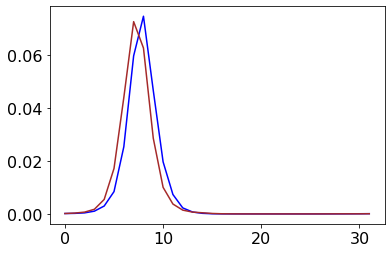

Xi: 0.7251211078168692
Scalar: (0.5698352818336992-0.24888822711184044j)
Norm: 1.0000000000000013


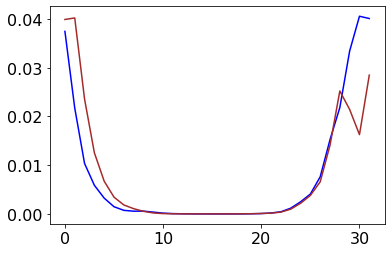

In [520]:
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Maxima)
importlib.reload(Plot_generator)

spin_length=4
sizes=[4,4,4,32]
folder_0="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf/"
folder="/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_0p5t_ov_N/"
conf='480'
t=np.arange(0,sizes[3])
zm1=0
zm2=0
for z in range(0,4):
    susy_mode_1=np.zeros((colors, spin_length, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
    susy_mode_2=np.zeros((colors,spin_length,  sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)  
    for i in range(0,1):
        mode,density,sizes=Read.ascii_mode(folder+"sector_1/OverlapMode"+str(conf)+"_"+str(2*(zm1+z)+i))
        susy_mode_1+=mode

        #mode,density,sizes=Read.ascii_mode(folder+"sector_1/OverlapMode"+str(conf)+"_"+str(2*(zm1+z)+i+1))
        #susy_mode_2+=mode
        mode,density,sizes=Read.ascii_mode(folder+"sector_0/OverlapMode"+str(conf)+"_"+str(2*(zm2+z)+i+1))
        susy_mode_2+=mode

    density_1=Read.mode_to_density(susy_mode_1,colors,spin_length,sizes)    
    density_2=Read.mode_to_density(susy_mode_2,colors,spin_length,sizes)
    print("Xi:",Compare.Geom_mean_1d(density_1.sum(axis=(0,1,2)),density_2.sum(axis=(0,1,2))))
    
    scalar=Read.scalar_product(susy_mode_1,susy_mode_2,sizes,colors,spin_length)
    print("Scalar:",scalar[0])
    density_1=Read.mode_to_density(susy_mode_1,colors,spin_length,sizes)   
    print("Norm:",density_1.sum())
    
    
    #density_1r=Read.mode_real_density(susy_mode_1,colors,spin_length,sizes,1)    
    #density_2r=Read.mode_real_density(susy_mode_2,colors,spin_length,sizes,0)

    """max_1=Maxima.nnneighbours(density_1,sizes)
    max_2=Maxima.nnneighbours(density_2,sizes)
    print("4d maxima")
    print(max_1)
    print(max_2)
    distance=0
    for i in range(0,4):
        distance+=(max_1[i][1]-max_2[i][1])**2
    print(np.sqrt(distance))
    print()
    
    print("1d maxima")
    print(Maxima.improve_1d(density_1.sum(axis=(0,1,2)),sizes[3]))
    print(Maxima.improve_1d(density_2.sum(axis=(0,1,2)),sizes[3]))"""

    density_top,sizes=Read.topology_1d(folder_0+"profile4dt1.5c"+str(conf)+"to.dat")

    plt.plot(t,density_1.sum(axis=(0,1,2))/4, color="blue")
    #plt.plot(t,-density_1r.sum(axis=(0,1,2))/4, color="green")


    plt.plot(t,density_2.sum(axis=(0,1,2))/4, color="brown")
    #plt.plot(t,-density_2r.sum(axis=(0,1,2))/4, color="red")  

    #plt.plot(t,density_1/4-density_2/4, color="black")
    plt.show()

In [400]:
array=np.array([1+2j])
array[0].conjugate()

(1-2j)

In [422]:
susy_mode_1[0,0,4,4,4,32]

IndexError: index 3 is out of bounds for axis 1 with size 3

In [503]:
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Maxima)
importlib.reload(Plot_generator)
mode,density,sizes=Read.ascii_mode(folder+"sector_1/OverlapMode"+str(120)+"_"+str(0))
susy_mode_1=mode
print(sizes)
scalar=Read.scalar_product(susy_mode_1,susy_mode_1,sizes,colors,spin_length)
print(scalar)
density_1=Read.mode_to_density(susy_mode_1,colors,spin_length,sizes)   
print(density_1.sum())

FileNotFoundError: [Errno 2] No such file or directory: '/ssd/ivsol/filtering/4x4x4x32/b2p44_new/gf_afm_0p5t_ov_N/sector_1/OverlapMode120_0'

In [462]:
importlib.reload(Compare)
importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Maxima)
importlib.reload(Plot_generator)

spin_length=4
sizes=[8,8,8,64]
folder="/ssd/ivsol/filtering/8x8x8x64_su2/gf_afm_0p5t_ov/"
conf='290'
t=np.arange(0,sizes[3])
zm1=0
zm2=0
for z in range(0,8):
    susy_mode_1=np.zeros((colors, spin_length, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
    susy_mode_2=np.zeros((colors,spin_length,  sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)  
    for i in range(0,2):
        mode,density,sizes=Read.ascii_mode(folder+"sector_1/OverlapMode"+str(conf)+"_"+str(2*(zm1+z)+i))
        #mode,density,sizes=Read.ascii_mode(folder+"sector_1/OverlapMode"+str(conf)+"_"+str(z*i))
        susy_mode_1+=mode

        mode,density,sizes=Read.ascii_mode(folder+"sector_0/OverlapMode"+str(conf)+"_"+str(2*(zm2+z)+i))
        #mode,density,sizes=Read.ascii_mode(folder+"sector_0/OverlapMode"+str(conf)+"_"+str(z*i))
        susy_mode_2+=mode

    density_1=Read.mode_to_density(susy_mode_1,colors,spin_length,sizes)    
    density_2=Read.mode_to_density(susy_mode_2,colors,spin_length,sizes)
    #density_1r=Read.mode_real_density(susy_mode_1,colors,spin_length,sizes,1)    
    #density_2r=Read.mode_real_density(susy_mode_2,colors,spin_length,sizes,0)
    scalar=Read.scalar_product(susy_mode_1,susy_mode_2,sizes,colors,spin_length)
    print(scalar)
    print(density_1.sum())

    #max_1=Maxima.nnneighbours(density_1,sizes)
    #max_2=Maxima.nnneighbours(density_2,sizes)
    #print("4d maxima")
    #print(max_1)
    #print(max_2)
    #distance=0
    #for i in range(0,4):
    #    distance+=(max_1[i][1]-max_2[i][1])**2
    #print(np.sqrt(distance))
    #print()
    
    
    print("1d maxima")
    print(Maxima.improve_1d(density_1.sum(axis=(0,1,2)),sizes[3]))
    print(Maxima.improve_1d(density_2.sum(axis=(0,1,2)),sizes[3]))


    plt.plot(t,density_1.sum(axis=(0,1,2))/4, color="blue")
    #plt.plot(t,-density_1r.sum(axis=(0,1,2))/4, color="green")


    plt.plot(t,-density_2.sum(axis=(0,1,2))/4, color="brown")
    #plt.plot(t,-density_2r.sum(axis=(0,1,2))/4, color="red")  

    #plt.plot(t,density_1/4-density_2/4, color="black")
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/ssd/ivsol/filtering/8x8x8x64_su2/gf_afm_0p5t_ov/sector_1/OverlapMode290_0'

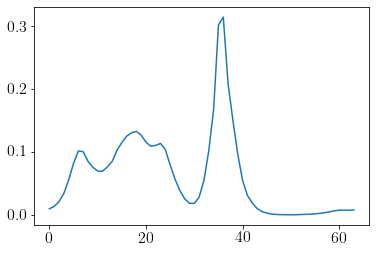

In [126]:
spin_length=4
folder="/ssd/ivsol/filtering/8x8x8x64_su2/gf_afm_0p5t_ov/"
conf='120'
sizes=[8,8,8,64]
t=np.arange(0,sizes[3])
susy_mode_1=zeromode=np.zeros((spin_length, colors, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
susy_mode_2=zeromode=np.zeros((spin_length, colors, sizes[0],sizes[1],sizes[2],sizes[3]),dtype=np.complex_)
for i in range(0,8):
    mode,density,sizes=Read.ascii_mode(folder+"sector_1/OverlapMode"+str(conf)+"_"+str(i+0))
    susy_mode_1+=mode

    mode,density,sizes=Read.ascii_mode(folder+"sector_0/OverlapMode"+str(conf)+"_"+str(i+0))
    susy_mode_1+=mode
    
density_1=Read.mode_to_density(susy_mode_1,colors,spin_length,sizes)    
density_2=Read.mode_to_density(susy_mode_2,colors,spin_length,sizes)
plt.plot(t,density_1/4)
#plt.plot(t,density_2/4, color="black")   
plt.show()

### Checking plaquettes

In [98]:
sizes=[4,4,4,32]
temp_file="../4x4x4x32/b2p44_new/check_plaquettes/Plaquettes.dat"
plaquettes = array.array('d')
with open(temp_file, 'rb') as file:
    for i in range(0,10):
        data=int.from_bytes(file.read(4),byteorder='little')
        print(data)
    n=sizes[0]*sizes[1]*sizes[2]*sizes[3]*6
    plaquettes.fromfile(file,n)
 

1
1
1
0
0
0
4
4
4
32


In [128]:
4*4*4*6

384

In [127]:
count=0
for element in plaquettes:
        if element<-0.1:
            print(element)
            print(count)
        count+=1

-0.99954733524963
90
-0.9996158625273368
186
-0.9999575566316357
282
-0.9996162131142488
307
-0.9999406289016783
331
-0.9999354566520684
355
-0.9995863764662462
362
-0.9992604228842776
368
-0.9992044133074459
374
-0.9999032149855249
378
-0.9996099562902646
379
-0.9995444483417268
380
-0.9969079022083297
474
-0.997420282664114
570
-0.99974153222639
666
-0.9978022685568946
691
-0.9996866279410939
715
-0.9996550013152102
739
-0.9976805987214545
746
-0.9949646773017199
752
-0.9944511602066107
758
-0.9993997669260166
762
-0.9977586731254178
763
-0.9973593522432983
764
-0.9877818112535338
858
-0.9900019559348909
954
-0.9991014684018116
1050
-0.9925514925620895
1075
-0.999035696871635
1099
-0.9989199944007032
1123
-0.9923426622394298
1130
-0.9798086326885124
1136
-0.9772006509084741
1142
-0.9978761340885822
1146
-0.9923687334472016
1147
-0.9909907142398546
1148
-0.9872483229847763
1242
-0.9895580688866774
1338
-0.9990611893601484
1434
-0.9923111846768687
1459
-0.9990258630639297
1483
-0.99886